#### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐를 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/NO 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼 파라미터가 존재
- 다른 ML 알고리즘에 비해 성능이 좋지는 않음 ==> 단! 여러개의 DT라 모이면 성능 강해짐
    * 앙상블에 주로 사용됨

[1] 모듈 로딩

In [102]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

[2] 데이터 준비

In [103]:
featuerDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featuerDF : {featuerDF.shape}, {featuerDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featuerDF : (150, 4), 2D
targetSR : (150,), 1D


[3] 데이터 전처리

생략

In [104]:
featuerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [105]:
featuerDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[4] 모델 학습 준비

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [107]:
# stratify 균일하게 섞기
# 75:25로 분리
X_train, X_test, y_train, y_test = train_test_split(featuerDF, targetSR, random_state=10, stratify=targetSR)

In [108]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (112, 4), 2D
y_train : (112,), 1D
X_test : (38, 4), 2D
y_test : (38,), 1D


[5] 모델 생성

In [109]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [110]:
# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}')
print(f'[dt_model.max_features] {dt_model.max_features_}')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3
[dt_model.max_features] 4
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[dt_model.feature_importances_] [0.03125249 0.         0.06844775 0.90029976]


[6] 성능평가

In [111]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)

# 테스트용 데이터셋에 대하 성능
test_score = dt_model.score(X_test, y_test)

In [112]:
print(f'train_score :{train_score}')
print(f'test_score: {test_score}')

train_score :1.0
test_score: 1.0


[7] 교차검증  => 데이터셋 부족 해결 및 과대적합을 회피

In [113]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [114]:
# 교차검증 분비 ==> 모델 인스턴스, trainDS, cv [기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result = cross_validate(dt_model2, X_train, y_train, return_estimator=True, return_train_score=True,scoring=['neg_mean_squared_error', 'r2'])

In [115]:
resultDF = pd.DataFrame(result)

In [116]:
resultDF

,fit_time,score_time,estimator,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2
0,0.003457,0.003613,DecisionTreeClassifier(random_state=1),-0.043478,-0.0,0.933140,1.0
1,0.000000,0.005955,DecisionTreeClassifier(random_state=1),-0.043478,-0.0,0.933140,1.0
2,0.002060,0.002292,DecisionTreeClassifier(random_state=1),-0.045455,-0.0,0.933131,1.0
3,0.000000,0.000000,DecisionTreeClassifier(random_state=1),-0.136364,-0.0,0.799392,1.0
4,0.000000,0.000000,DecisionTreeClassifier(random_state=1),-0.090909,-0.0,0.866261,1.0


[8] 성능 향상 위한 튜닝 ==> 하이퍼파라미터 설정
- 단점 : 과대적합
    * max_depth
    * min_samples_leaf 등등 많음
    

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
# 하이퍼파라미터 dict 생성
params = {'max_depth':[4,3,2,1],
          'min_samples_leaf':[5,3,2]}

In [119]:
dmodel = DecisionTreeClassifier()
gridCV=GridSearchCV(dmodel, params, cv=5, return_train_score=True)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [120]:
# 모델 파라미터
print(f'[gridCV.best_params_] {gridCV.best_params_}')
print(f'[gridCV.best_score_] {gridCV.best_score_}')
print(f'[gridCV.best_estimator_] {gridCV.best_estimator_}')
print(f'[mse]')
cv_resultDF=pd.DataFrame(gridCV.cv_results_)

[gridCV.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gridCV.best_score_] 0.9371541501976285
[gridCV.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
[mse]


In [121]:
# 가장 좋은 모델
best_model = gridCV.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


In [122]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.01321873, 0.        , 0.59964451, 0.38713677]), 4)

[9] 시각화

In [123]:
import matplotlib.pyplot as plt

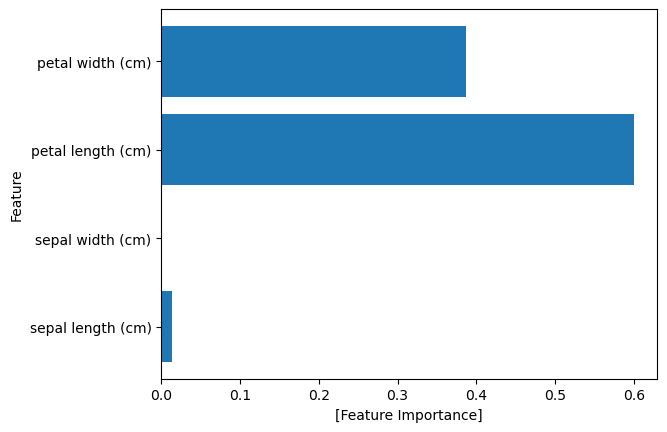

In [124]:
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

- DT 그래프 시각화
    * Graphviz 프로그램 설치 + python용 패키지 graphviz 설치

In [125]:
# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()

from sklearn.tree import export_graphviz


export_graphviz(best_model, out_file='tree.dot',
                class_names=['setosa', 'versicolor', 'verginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True)

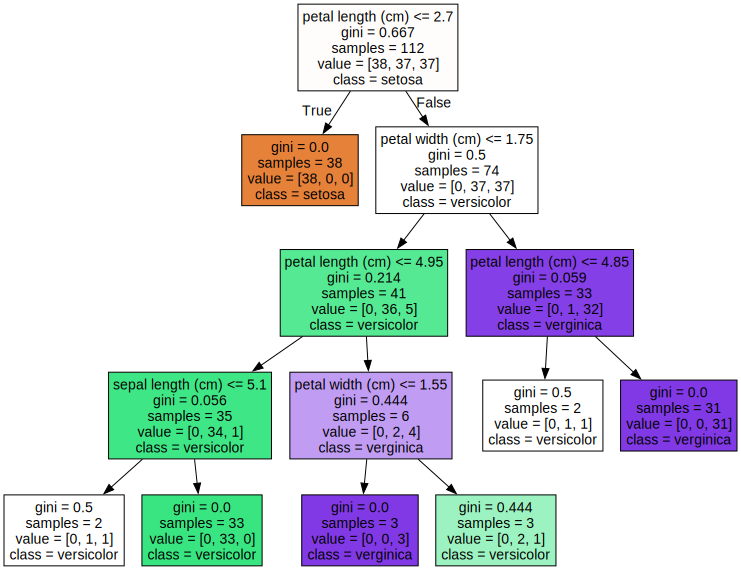

In [126]:
# (2) dot 파일 출력
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

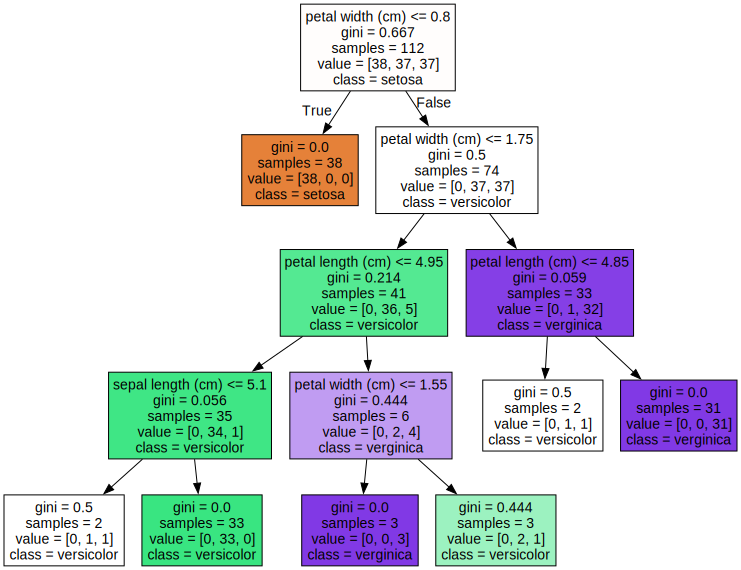

In [127]:
# (2) dot 파일 출력
import graphviz

with open("tree5.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[10] 새로운 데이터 예측

In [131]:
new_data=featuerDF.iloc[:1]+0.21
new_data.shape

(1, 4)

In [132]:
best_model.predict(new_data)

array([0])

In [133]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])